In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df["TARGET"]=boston.target

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
scaler=StandardScaler()
scaler.fit(df.values[:,:-1])
df.values[:,:-1]=scaler.transform(df.values[:,:-1]).round(4)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,-0.4132,-0.4877,0.1157,-0.2726,0.1581,0.4393,0.0187,-0.6258,-0.9828,-0.8032,1.1765,0.3872,-0.4181,22.4
502,-0.4152,-0.4877,0.1157,-0.2726,0.1581,-0.2345,0.2889,-0.7166,-0.9828,-0.8032,1.1765,0.4411,-0.5008,20.6
503,-0.4134,-0.4877,0.1157,-0.2726,0.1581,0.9850,0.7974,-0.7737,-0.9828,-0.8032,1.1765,0.4411,-0.9830,23.9
504,-0.4078,-0.4877,0.1157,-0.2726,0.1581,0.7257,0.7370,-0.6684,-0.9828,-0.8032,1.1765,0.4032,-0.8653,22.0
505,-0.4150,-0.4877,0.1157,-0.2726,0.1581,-0.3628,0.4347,-0.6132,-0.9828,-0.8032,1.1765,0.4411,-0.6691,11.9


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

data=torch.from_numpy(df.values).float()

x=data[:,:-1]
y=data[:,-1:]

print(x.shape,y.shape)

torch.Size([506, 13]) torch.Size([506, 1])


In [6]:
# Define configurations.
n_epochs=200000
learning_rate=1e-4
print_interval=10000

In [7]:
# Define costum model.
class MyModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        self.input_dim=input_dim
        self.output_dim=output_dim
        
        super().__init__()
        
        self.linear1=nn.Linear(input_dim,3)
        self.linear2=nn.Linear(3,3)
        self.linear3=nn.Linear(3,3)
        self.linear4=nn.Linear(3,output_dim)
        self.act=nn.ReLU()
        
    def forward(self,x):
        h=self.act(self.linear1(x))
        h=self.act(self.linear2(h))
        h=self.act(self.linear3(h))
        y=self.linear4(h)
        return y
    
model=MyModel(x.size(-1),y.size(-1))
print(model)

MyModel(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=3, bias=True)
  (linear4): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)


In [9]:
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [10]:
for i in range(n_epochs):
    y_hat=model(x)
    loss=F.mse_loss(y_hat,y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if (i+1)%print_interval==0:
        print('Epoch %d/%d: loss=%.4f' %(i+1,n_epochs,loss))

Epoch 10000/200000: loss=12.2532
Epoch 20000/200000: loss=10.6038
Epoch 30000/200000: loss=9.8235
Epoch 40000/200000: loss=9.4908
Epoch 50000/200000: loss=9.3684
Epoch 60000/200000: loss=9.3188
Epoch 70000/200000: loss=9.2605
Epoch 80000/200000: loss=9.2142
Epoch 90000/200000: loss=9.1918
Epoch 100000/200000: loss=9.1405
Epoch 110000/200000: loss=8.9797
Epoch 120000/200000: loss=8.9170
Epoch 130000/200000: loss=8.7329
Epoch 140000/200000: loss=8.6364
Epoch 150000/200000: loss=8.5635
Epoch 160000/200000: loss=8.4648
Epoch 170000/200000: loss=8.4129
Epoch 180000/200000: loss=8.3868
Epoch 190000/200000: loss=8.3727
Epoch 200000/200000: loss=8.3677


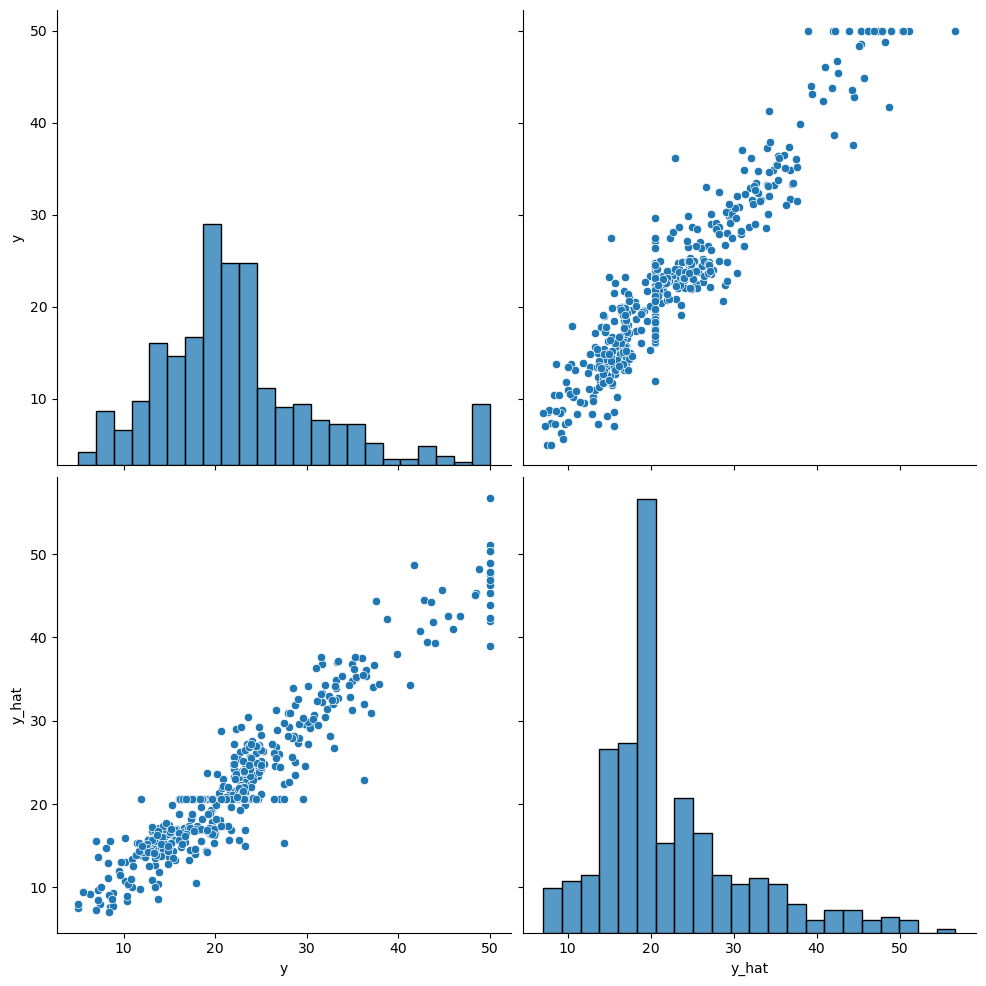

In [11]:
df=pd.DataFrame(torch.cat([y,y_hat],dim=1).detach().numpy(),columns=["y","y_hat"])
sns.pairplot(df,height=5)
plt.show()